In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data-export (1).csv")

In [10]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.columns = df.iloc[0]
df= df.drop(index=0).reset_index(drop = True)
df.columns=["channel group","DataHour","Users","Sessions","Engaed Sessions","Average Engagement time per","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [15]:
df.head()

,channel group,DataHour,Users,Sessions,Engaed Sessions,Average Engagement time per,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   channel group                3181 non-null   object
 1   DataHour                     3181 non-null   object
 2   Users                        3181 non-null   object
 3   Sessions                     3181 non-null   object
 4   Engaed Sessions              3181 non-null   object
 5   Average Engagement time per  3181 non-null   object
 6   Engaged sessions per user    3181 non-null   object
 7   Events per session           3181 non-null   object
 8   Engagement rate              3181 non-null   object
 9   Event count                  3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [22]:
df["DataHour"] = pd.to_datetime(df["DataHour"], format="%Y%m%d%H", errors="coerce")


In [25]:
df.head()

,channel group,DataHour,Users,Sessions,Engaed Sessions,Average Engagement time per,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [29]:
numeric_cols = df.columns.drop(["channel group","DataHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors="coerce")
df["Hour"] = df["DataHour"].dt.hour

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   channel group                3181 non-null   object        
 1   DataHour                     3181 non-null   datetime64[ns]
 2   Users                        3181 non-null   int64         
 3   Sessions                     3181 non-null   int64         
 4   Engaed Sessions              3181 non-null   int64         
 5   Average Engagement time per  3181 non-null   float64       
 6   Engaged sessions per user    3181 non-null   float64       
 7   Events per session           3181 non-null   float64       
 8   Engagement rate              3181 non-null   float64       
 9   Event count                  3181 non-null   int64         
 10  Hour                         3181 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1),

In [32]:
df.head()

,channel group,DataHour,Users,Sessions,Engaed Sessions,Average Engagement time per,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [33]:
df.describe()

,DataHour,Users,Sessions,Engaed Sessions,Average Engagement time per,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


# Sessions and User over Time

In [34]:
sns.set(style="whitegrid")

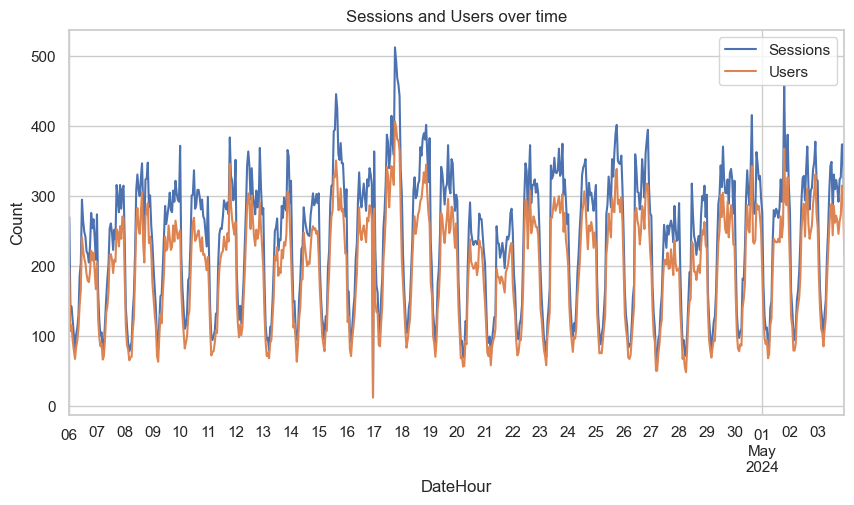

In [41]:
plt.figure(figsize=(10, 5))   # width=10, height=5
df.groupby("DataHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()


# Total Users by Channel

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_32944\1338600874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x= "channel group", y="Users", estimator=np.sum, palette="viridis")


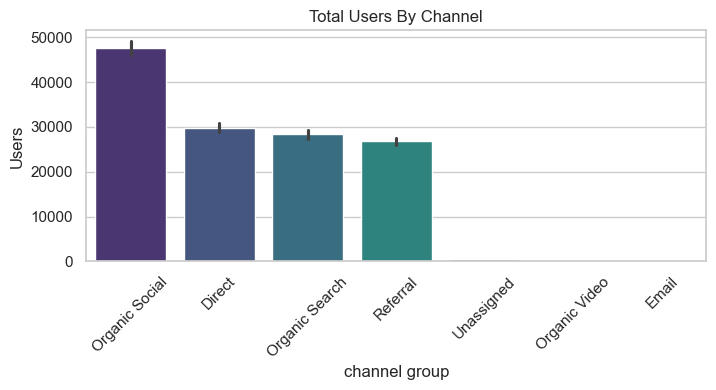

In [43]:
plt.figure(figsize = (8,3))
sns.barplot(data = df, x= "channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users By Channel")
plt.xticks(rotation = 45)
plt.show()

# Average engagement time by channel

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_32944\663394250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


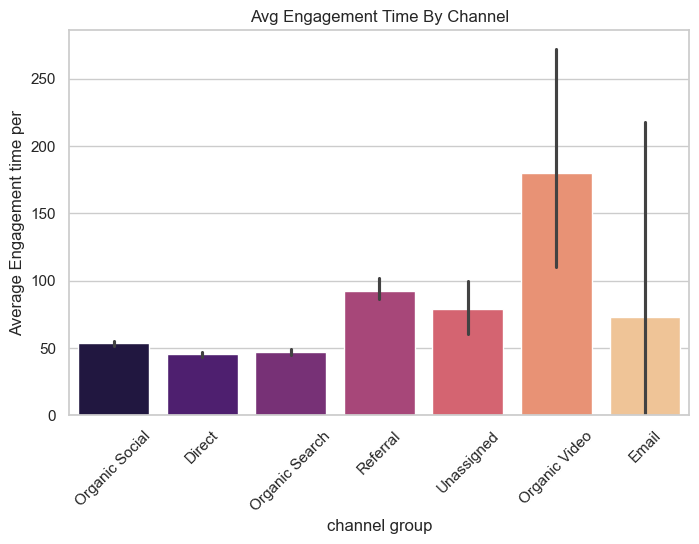

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="channel group",
    y="Average Engagement time per",
    estimator=np.mean,
    palette="magma"
)
plt.title("Avg Engagement Time By Channel")
plt.xticks(rotation=45)
plt.show()


# Engagement Rate Distribution By Channel

C:\Users\CHAITANYA\AppData\Local\Temp\ipykernel_32944\3984909571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="channel group", y= "Engagement rate" , palette="coolwarm")


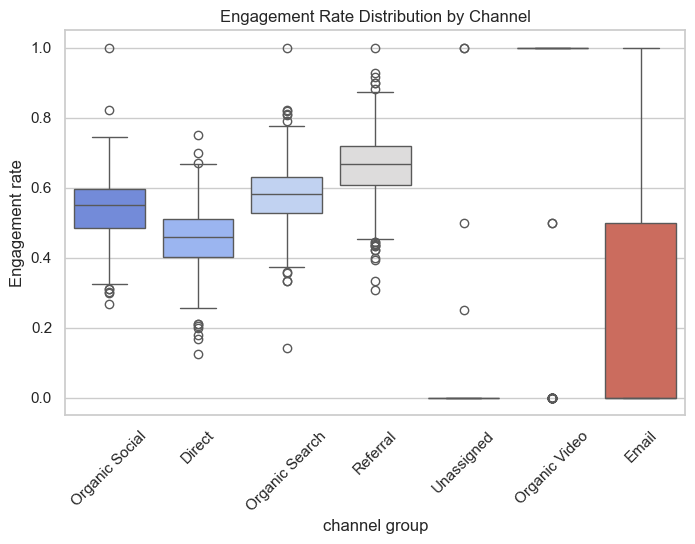

In [48]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df,x="channel group", y= "Engagement rate" , palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation =45)
plt.show()

# Engagement vs non engagement ssession

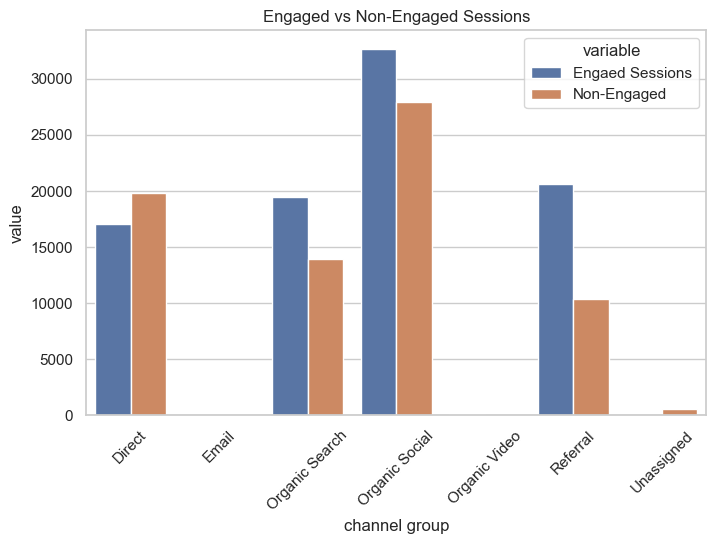

In [55]:
 session_df = df.groupby("channel group")[["Sessions", "Engaed Sessions"]].sum().reset_index()
 session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaed Sessions"]
 session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaed Sessions","Non-Engaged"])

 plt.figure(figsize=(8, 5))
 sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
 plt.title("Engaged vs Non-Engaged Sessions")
 plt.xticks(rotation=45)
 plt.show()


# traffic by hours and channel

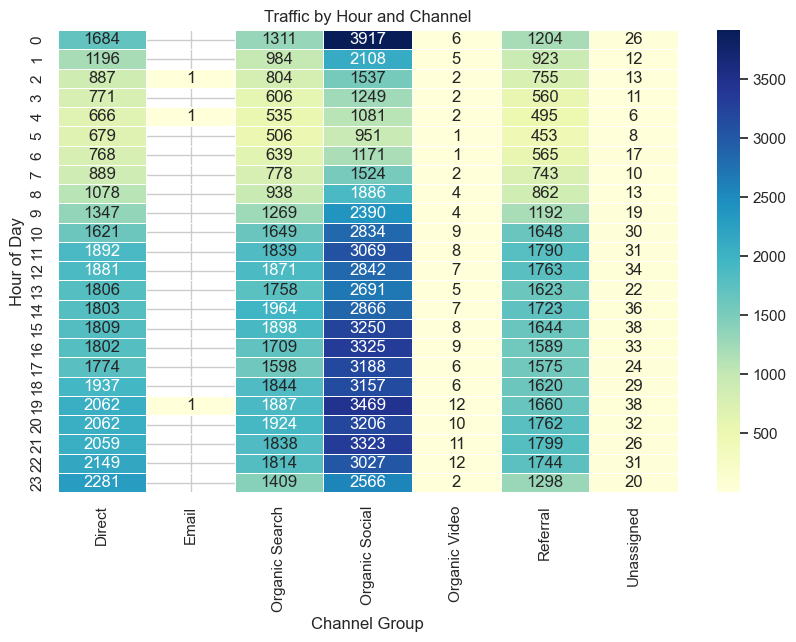

In [58]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=.5,
    annot=True,
    fmt='.0f'
)
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


# engagement rate vs Sessions over time

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


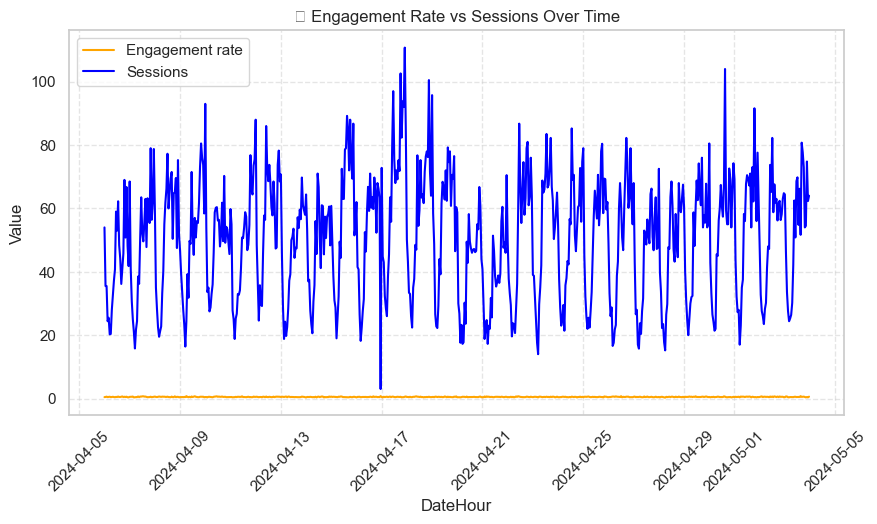

In [61]:
# Group and reset index
df_plot = df.groupby("DataHour")[["Engagement rate", "Sessions"]].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_plot["DataHour"], df_plot["Engagement rate"], label="Engagement rate", color="orange")
plt.plot(df_plot["DataHour"], df_plot["Sessions"], label="Sessions", color="blue")

# Formatting
plt.title("📊 Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()
